In [1]:
import sys # импортируем библиотеки
import numpy
import math
import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re
import sys
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import statistics
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import Entrez
from Bio import SeqIO
Entrez.email= "pavel-kravchenk0@yandex.ru"
from Bio.SeqUtils import GC
from time import clock
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord
from dna_features_viewer import BiopythonTranslator
import subprocess
import random
from random import randrange 
import argparse
from itertools import groupby
import itertools
from Bio.Alphabet import generic_dna
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import IUPAC, Gapped
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline
from sys import argv
from Bio import AlignIO
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from scipy import stats
import matplotlib.pyplot as plt
import networkx as nx
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
from fuzzywuzzy import fuzz
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.codonalign.codonseq import _get_codon_list, CodonSeq, cal_dn_ds
from Bio.codonalign.codonalphabet import (default_codon_table, default_codon_alphabet)
from statistics import mean 
from sklearn.manifold import TSNE
import operator
from fuzzywuzzy import process 
from fuzzywuzzy import fuzz
import os, io, random
import string
from Bio.Align import MultipleSeqAlignment
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD

from Levenshtein import distance
import collections
import random
import statistics
from pandas.io.common import is_url

/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/codonalign/__init__.py:27: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [4]:

#///////////////////////////////////
code_calc = {"UUU": 0, "UUC": 0, "UUA": 0, "UUG": 0, # словарь для хранения встреченных кодонов
    "UCU": 0, "UCC": 0, "UCA": 0, "UCG": 0,
    "UAU": 0, "UAC": 0, "UAA": 0, "UAG": 0,
    "UGU": 0, "UGC": 0, "UGA": 0, "UGG": 0,
    "CUU": 0, "CUC": 0, "CUA": 0, "CUG": 0,
    "CCU": 0, "CCC": 0, "CCA": 0, "CCG": 0,
    "CAU": 0, "CAC": 0, "CAA": 0, "CAG": 0,
    "CGU": 0, "CGC": 0, "CGA": 0, "CGG": 0,
    "AUU": 0, "AUC": 0, "AUA": 0, "AUG": 0,
    "ACU": 0, "ACC": 0, "ACA": 0, "ACG": 0,
    "AAU": 0, "AAC": 0, "AAA": 0, "AAG": 0,
    "AGU": 0, "AGC": 0, "AGA": 0, "AGG": 0,
    "GUU": 0, "GUC": 0, "GUA": 0, "GUG": 0,
    "GCU": 0, "GCC": 0, "GCA": 0, "GCG": 0,
    "GAU": 0, "GAC": 0, "GAA": 0, "GAG": 0,
    "GGU": 0, "GGC": 0, "GGA": 0, "GGG": 0}

SD = ({'A':0.29,'T':0.47,'G':0.11,'C':0.13}, # матрица с SD 
      {'A':0.42,'T':0.00,'G':0.15,'C':0.43},
      {'A':0.81,'T':0.11,'G':0.00,'C':0.08},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.00,'T':0.00,'G':1.0,'C':0.00},
      {'A':0.97,'T':0.00,'G':0.02,'C':0.01},
      {'A':0.23,'T':0.07,'G':0.66,'C':0.04})

code = {"UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L", # словарь для перекодирования
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "UAU": "Y", "UAC": "Y", "UAA": "STOP", "UAG": "STOP",
    "UGU": "C", "UGC": "C", "UGA": "STOP", "UGG": "W",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "AAN": "!", "AUN": "!", "ACN": "!", "AGN": "!",
    "UAN": "!", "UAN": "!", "UAN": "!", "UAN": "!",
    "GAN": "!", "GAN": "!", "GAN": "!", "GAN": "!",
    "CAN": "!", "CAN": "!", "CAN": "!", "CAN": "!",
    "ANN": "!", "UNN": "!", "GNN": "!", "CNN": "!"}


def checkSD(SD_seq): # функция для поиска SD
    score = 0
    for n in range(len(SD_seq)-7):
        sub = SD_seq[n:n+7]
        subscore = 1
        for l in range(len(sub)):
            if sub[l] in SD[l]:
                subscore *= SD[l][sub[l]]
            else:
                subscore *= 0
        score = max(subscore, score)
    return round(score, round_param)


def ProteinAnalysis_func(protein): # просые параметры белка 
    try:
        X = ProteinAnalysis(protein)
        molecular_weight = X.molecular_weight()
        aromaticity = X.aromaticity()
        instability_index = X.instability_index()
        isoelectric_point = X.isoelectric_point()
        gravy = X.gravy()
        return round(molecular_weight, round_param), round(aromaticity, round_param), round(instability_index, round_param), round(isoelectric_point, 
                                                 round_param), round(gravy, round_param)
    except ValueError:
        return None, None, None, None, None
    except ZeroDivisionError:
        return None, None, None, None, None
    
def getGC(seq): #Calculate GC content
    try:
        total = 0
        GC = 0
        seqTot = seq.replace('N','')
        seqNoAT = re.sub('[ATN]', '', seq)
        total += len(seqTot)
        GC += len(seqNoAT)
        return round(GC/total, round_param)
    except ZeroDivisionError:
        return 0

def scoreTr(code_calc_seq, amino_info_collector_seq, code_calc_prot, amino_info_collector_prot): 
    #Score self Trtable against global tr table (compare frequencies of each codon)
    score = 0
    for key in code_calc_prot.keys():
        if code[key] in amino_info_collector_prot:
            code_calc_prot[key] = code_calc_prot[key]/amino_info_collector_prot[code[key]]
        else:
            code_calc_prot[key] = 0

    for key in code_calc_prot.keys():
        score += (code_calc_prot[key] - code_calc_seq[key])**2 #Score is sum of the squares of the differences
    return round(score, round_param)
   
    
def blast_search(record_id, record): # модуль для поиска по бласту 
    #Do blastn search and search results in xml file
    print("Starting QBlast search...")
    result_handle = NCBIWWW.qblast("blastn", "nt", record, hitlist_size=20, 
                                   format_type="XML", genetic_code="Vertebrate Mitochondrial")
    blast_results = result_handle.read()
    save_file = open("blast_" + record_id + ".xml", "w")
    print("Writing QBlast search results...")
    save_file.write(blast_results)
    save_file.close()
    print("Finished QBlast.")

    #Open blast xml and load the blast record
    result_handle = open("blast_" + record_id + ".xml")
    blast_records = NCBIXML.parse(result_handle)
    blast_record = blast_records.__next__()

    #Store all accession ids
    output = {}
    for x in blast_record.alignments:
        output[x.accession] = [x.length]
    print("Total " + str(len(output)) + " records retrieved.")

    #Do entrez.efetch to retrieve all records in genbank file, store locally
    local_file = open("blast_" + record_id + ".fasta", 'w')

    counter = 1
    for x in output:
        print(x)
        print("Downloading genbank records " + str(counter) + "...")
        try:
            handle = Entrez.efetch(db="nucleotide",id = x,rettype="fasta", )
            local_file.write(handle.read())
            handle.close()
        except:
            print("Accsession id is not found")
        counter = counter + 1
        print("Progress is {:2.1%}".format(list(output.keys()).index(x)/len(list(output.keys())), end="\r"))
        
    local_file.close()
    print("Finished genbank processing.")
    

def orf_finder(sequence, frame, genetic_code_table_id): # модуль для поиска ORFs
    #stop_codons = ['TGA', 'TAG', 'TAA']  # стоп кодоны
    #start_codon = ['ATG'] # старт кодоны (есть дополнительные старт кодоны - )
    standard_table = CodonTable.unambiguous_dna_by_id[genetic_code_table_id]
    
    stop_codons = standard_table.stop_codons  # стоп кодоны
    start_codon = standard_table.start_codons # старт кодоны (есть дополнительные старт кодоны - )
    #print("stop_codons used ---", stop_codons)
    #print("start_codon used ---", start_codon)
    
    start_positions = []
    stop_positions = [len(sequence)+1]
    position_dict = {}
    orffound = {}
    #print(sequence)
    
    for i in range(frame, len(sequence), 3):  # рубим последовательнсть на тройки
        #print(i)
        codon = sequence[i:(i + 3)].upper()
        #print(codon)
        if codon in start_codon:  # проверяем на вхождение в старт\стоп кодоны
            start_positions.append(i)
            #print(start_positions)
            #print("codon in start_codon")
        if codon in stop_codons:
            stop_positions.append(i)
            #print("codon in stop_codons")
            
    #print(start_positions)
    if len(start_positions) >= 1 and len(stop_positions) >= 1:
        counter = 0
        for position_start in sorted(start_positions):  # делаем словарь ORFs
            for position_stop in sorted(stop_positions):
                delta = int(position_stop) - int(position_start)
                if minimal_len_prot_3 < delta and maximal_len_prot_3 > delta:
                    nameorf = "orf" + str(counter)
                    counter += 1
                    orffound[nameorf] = position_start, position_stop
                    break
                else:
                    pass
    return orffound


def module_fasta_writer(out_file, line):  # модуль для записи в fasta формате 
    start_point = 0 # writes in fasta format by 60 nums in each line
    end_point = 60
    if len(line) > 60:
        len_line = len(line)
        while len_line > 0:
            j = line[start_point:end_point]
            len_line = len_line - 60
            out_file.write(j + "\n")
            start_point = start_point + 60
            end_point = end_point + 60
    else:
        out_file.write(line + "\n")


def codon_stat(line_in, frame=0): # коллектор простотй статистики 
    line_in = line_in.replace('T', 'U') # делаем из ДНК РНК ;)
    amino_info_collector = {}
    code_calc_tmp = code_calc.copy()
    #print(line_in)
    #print(code_calc_tmp)

    for i in range(frame, len(line_in), 3):
        #print(i)
        codon = line_in[i:(i + 3)]
        #print(codon)
        if codon in code_calc_tmp.keys(): # считаем кодоны
            code_calc_tmp[codon] = int(code_calc_tmp[codon]) + 1

        if codon in code.keys(): # считаем аминокислоты, но другим способом
            ama = code[codon]
            if ama in amino_info_collector.keys():
                amino_info_collector[ama] = int(amino_info_collector[ama]) + 1
            else:
                amino_info_collector[ama] = 1
    
    #print(code_calc_tmp, amino_info_collector)
    return code_calc_tmp, amino_info_collector


def nuc_stat_counter(sequence): # модуль для подсчета нуклеотидов
    nuc_collector = {}
    for i in range(len(sequence)):
        nuc = sequence[i]
        if nuc in nuc_collector.keys():
            nuc_collector[nuc] = int(nuc_collector[nuc]) + 1
        else:
            nuc_collector[nuc] = 1
    return nuc_collector


def plot_local_gc_content(record, window_size, ax):
    gc_content = lambda s: 100.0*len([c for c in s if c in "GC"]) / len(s)
    yy = [gc_content(record.seq[i:i+window_size])
          for i in range(len(record.seq)-window_size)]
    #print(yy)
    xx = np.arange(len(record.seq)-window_size)
    #print(xx)
    ax.fill_between(xx, yy, alpha=0.5)
    ax.set_ylabel("GC(%)")
    
    
def reverseComplement(s):
    sequence = Seq(s, generic_dna)
    sequence_rev = str(sequence.reverse_complement())
    return sequence_rev


def longestStem(s, stem_threshold): # поиск шпильки в окне 
    n = len(s)
    k = int(n/2) #length of longest possible stem
    candidate = ''
    i = 1
    start1 = None
    start2 = None
    
    while i <= k and len(candidate) == i - 1:
        for j in range(n-2*i+1):
            t = s[j:i+j]
            if reverseComplement(t) in s[i+j:]:
                #print(s.find(reverseComplement(t)), s.find(s[i+j:]))
                if s[i+j:].find(reverseComplement(t)) - j > stem_threshold:
                    candidate = t
                    start1 = j
                    start2 = s[i+j:].find(reverseComplement(t))
                    break
        i +=1
    return candidate, start1, start2




class FEATURE: # пртсотой класс для перегрузки биопитоновской записи 
    def __init__(self, gene = None, start = None, end = None, strand = None, 
                 feature_type = None, codon_start = None, product = None, 
                 protein_id = None, translation = None, transl_table = None, note = None, 
                 feature_biopython = None):
        self.gene = gene
        self.start = start
        self.end = end
        self.strand = strand
        self.feature_type = feature_type
        self.codon_start = codon_start
        self.product = product
        self.protein_id = protein_id
        self.translation = translation
        self.transl_table = transl_table
        self.note = note
        self.feature_biopython = feature_biopython
        
        
    def __str__(self):
        out = "gene --- {gene} \n start --- {start}  \n end --- {end} \n strand --- {strand} \n feature_type --- {feature_type} \n codon_start --- {codon_start} \n product --- {product} \n protein_id --- {protein_id} \n translation --- {translation} \n transl_table --- {transl_table} \n note --- {note} \n".format(gene=self.gene,
        start = self.start,
        end = self.end,
        strand=self.strand, 
        feature_type=self.feature_type, 
        codon_start=self.codon_start, 
        product=self.product, 
        protein_id=self.protein_id, 
        translation=self.translation, 
        transl_table=self.transl_table,
        note = self.note)
        return out


class GB_RECORD:
    def __init__(self, ID = None, Len = None, seq_type = None, 
                 definition = None, organism = None, features = None, 
                 sequence = None, rev_comp_sequence = None, feature_count = None):
        self.ID = ID
        self.Len = Len
        self.seq_type = seq_type
        self.definition = definition
        self.organism = organism
        self.features = features
        self.sequence = sequence
        self.rev_comp_sequence = rev_comp_sequence
        self.feature_count = feature_count
        #print(self.ID,self.Len,self.seq_type,self.definition,self.organism,self.sequence)
        
    def __str__(self):
        out = "ID --- {ID} \t Len --- {Len} \t seq_type --- {seq_type} \n definition --- {definition} \n organism --- {organism} \n sequence --- {sequence} \n rev_comp_sequence --- {rev_comp_sequence} \n feature_count --- {feature_count} \n".format(ID=self.ID,
        Len=self.Len,
        seq_type=self.seq_type,
        definition=self.definition,
        organism=self.organism,
        sequence=self.sequence[:100],
        rev_comp_sequence=self.rev_comp_sequence[:100], 
        feature_count=self.feature_count)
        
        #out = ""
        for i in range(self.feature_count):
            out += str(self.features[i])
        return out
        
def GC_shaker(sequence, frame):
    a = []
    for i in range(0, len(sequence), frame):
        s = list(sequence[i:i+frame])
        #print(s)
        random.shuffle(s)
        #print(s)
        a.extend(s)
        #print(string_utils.shuffle(s)))
    return ''.join(a)

#///////////////////////////////////
root = "/home/pavel/Desktop/8_семестр/GEL/" # os.getcwd() # просто корень, где будем работать
os.chdir(root)
    
minimal_len_prot = 50 #int(input("Type the minimal protein length "))
maximal_len_prot = 1000 #int(input("Type the maximal protein length "))
minimal_len_prot_3 = minimal_len_prot * 3 # получили длину в нуклеотидах
maximal_len_prot_3 = maximal_len_prot * 3

round_param = 4
#genetic_code_table_id = 2
stem_threshold = 4
gap_threshold = 0.25
window_right = 0
window_left = 0
genetic_code_table_id = 11

file = "/home/pavel/Desktop/8_семестр/GEL/20.fasta"
print("Input file ... ")
#[print(x) for x in files_gb]
print("")

record = SeqIO.read(file, "fasta")

#print(record.seq)



prot_calc = 0 # заводим счетчики для полипептидов         
out_protein_orf_record_id = "out_protein_orf.csv"
with open(out_protein_orf_record_id, "w") as out_file:
    out_file.write("Nuc seq" + 
                   "\t" + "Amino seq" + 
                   "\t" + "SD seq" + 
                   "\t" + "SD score" + 
                   "\t" + "Frame" + 
                   "\t" + "ORF start" + 
                   "\t" + "ORF end" + 
                   "\t" + "Ama len" + 
                   "\t" + "GC%" + 
                   "\t" + "GC fold change" + 
                   "\t" + "Codon usage" + 
                   "\t" + "Molecular weight" + 
                   "\t" + "Aromaticity" + 
                   "\t" + "Instability index" + 
                   "\t" + "Isoelectric point" + 
                   "\t" + "Gravy" + 
                   "\t" + "Stem loop seq" +
                   "\t" + "Stem loop found" +
                   "\t" + "Stem loop 1 pos." +
                   "\t" + "Stem loop 2 pos." +
                   "\t" + "Strand" +
                   #"\t" + "First BLAST organism" +
                   #"\t" + "First BLAST overlap" +
                   #"\t" + "First BLAST E-value" +
                   "\n")



    sub_seq = str(record.seq)
    sequence = str(record.seq)
    sub_seq_rev_comp = str(Seq(sub_seq, generic_dna).reverse_complement())


    orf_count = 0
    orf_dict = {}
    for i in range(3):  # перебираем каждую из рамок на прямой цепи
        #print("Iteration", i)
        frame = i
        orfs = orf_finder(sub_seq, frame, genetic_code_table_id) # запускаем функцию поиска (последовательность, рамка)
        orf_dict[i] = orfs
        orf_count += len(orfs)
        #print(orf_count)



    for j in range(3): # и на обратной
        #print("Iteration", -j-1)
        frame_rev = j
        orfs_rev = orf_finder(sub_seq_rev_comp, frame_rev, genetic_code_table_id)
        orf_dict[j + 3] = orfs_rev
        orf_count += len(orfs)
        #print(orf_count)


    #print(orf_dict)

    for i in orf_dict.keys():  # for frame in dict --- для каждой из рамок
        #print("Current frame is ",i)

        if int(i) <= 2: # простые статистики. Собираем словари с частотами амк и кодонов.
            #print(sequence)
            code_calc_seq, amino_info_collector_seq = codon_stat(sub_seq, i)

        if int(i) > 2:
            #print(sequence_rev)
            code_calc_seq, amino_info_collector_seq = codon_stat(sub_seq_rev_comp, i-3)

        #print(len(orf_dict[i]))
        for j in orf_dict[i]:  # for orf in frame --- для каждой ORF
            #print(j)

            if int(i) <= 2: 
                strand = 1
                left_border = int(orf_dict[i][j][0])
                right_border = int(orf_dict[i][j][1])

                orf_nt = sub_seq[left_border:right_border]
                #print(orf_nt)
                orf_aa = str(Seq(orf_nt, generic_dna).translate(table=genetic_code_table_id, 
                                                                to_stop=False))   
                #print(orf_aa)
                if orf_aa is np.nan:
                    print(orf_nt)
                    continue

                if "*" in orf_aa:
                    #print("STOP found")
                    continue

                #print(orf_aa) # проверяем нет ли SD перед нашим ORF
                SD_seq = sub_seq[left_border - 30:left_border]
                if len(SD_seq) == 30:
                    SD_score = checkSD(SD_seq)
                else:
                    SD_score = 0

                # считаем codone usage
                code_calc_orf, amino_info_collector_orf = codon_stat(orf_nt)
                scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, 
                                         code_calc_orf, amino_info_collector_orf)    


                # собираем параметры нашего ORF  из чудесного пакета 
                molecular_weight, aromaticity, instability_index, isoelectric_point, gravy = ProteinAnalysis_func(orf_aa)

                # ищем шкильки
                left_border_stem_loom = left_border - 350
                right_border_stem_loom = left_border

                Stem_loop_found_seq, Stem_loop_start, Stem_loop_end = longestStem(sub_seq[left_border_stem_loom:right_border_stem_loom], 
                                            stem_threshold)
                prot_calc += 1

                out_file.write(str(orf_nt) + 
                               "\t" + str(orf_aa) + 
                               "\t" + str(SD_seq) + 
                               "\t" + str(SD_score) + 
                               "\t" + str(i) + 
                               "\t" + str(left_border) + 
                               "\t" + str(right_border) + 
                               "\t" + str(int((right_border - left_border)/3)) + 
                               "\t" + str(getGC(orf_nt)) + 
                               "\t" + str(round(getGC(orf_nt)/getGC(sub_seq), round_param)) + 
                               "\t" + str(scoreTr_result) + 
                               "\t" + str(molecular_weight) + 
                               "\t" + str(aromaticity) + 
                               "\t" + str(instability_index) + 
                               "\t" + str(isoelectric_point) + 
                               "\t" + str(gravy) + 
                               "\t" + str(sub_seq_rev_comp[left_border_stem_loom:right_border_stem_loom]) +
                               "\t" + str(Stem_loop_found_seq) +
                               "\t" + str(Stem_loop_start) + 
                               "\t" + str(Stem_loop_end) +
                               "\t" + str(strand) +
                               #"\t" + "First BLAST organism" +
                               #"\t" + "First BLAST overlap" +
                               #"\t" + "First BLAST E-value" +
                               "\n")



            ###############################
            if int(i) > 2:
                strand = -1
                left_border = int(orf_dict[i][j][0])
                right_border = int(orf_dict[i][j][1])

                orf_nt = sub_seq_rev_comp[left_border:right_border]
                #print(orf_nt, len(orf_nt))
                orf_aa = str(Seq(orf_nt, generic_dna).translate(table=genetic_code_table_id, 
                                                                to_stop=False))  
                #print(orf_aa)
                if orf_aa is np.nan:
                    print(orf_nt)
                    continue

                if "*" in orf_aa:
                    #print("STOP found")
                    continue

                #print(orf_aa)
                SD_seq = sub_seq[left_border - 30:left_border]
                if len(SD_seq) == 30:
                    SD_score = checkSD(SD_seq)
                else:
                    SD_score = 0

                #print(orf_aa)
                code_calc_orf, amino_info_collector_orf = codon_stat(orf_nt)
                scoreTr_result = scoreTr(code_calc_seq, amino_info_collector_seq, 
                                         code_calc_orf, amino_info_collector_orf)    


                molecular_weight, aromaticity, instability_index, isoelectric_point, gravy = ProteinAnalysis_func(orf_aa)

                left_border_stem_loom = left_border - 350
                right_border_stem_loom = left_border


                Stem_loop_found_seq, Stem_loop_start, Stem_loop_end = longestStem(sub_seq_rev_comp[left_border_stem_loom:right_border_stem_loom], 
                                            stem_threshold)
                prot_calc += 1

                #print(strand)
                out_file.write(str(orf_nt) + 
                               "\t" + str(orf_aa) + 
                               "\t" + str(SD_seq) + 
                               "\t" + str(SD_score) + 
                               "\t" + str(i) + 
                               "\t" + str(left_border) + 
                               "\t" + str(right_border) + 
                               "\t" + str(int((right_border - left_border)/3)) + 
                               "\t" + str(getGC(orf_nt)) + 
                               "\t" + str(round(getGC(orf_nt)/getGC(sub_seq_rev_comp), round_param)) + 
                               "\t" + str(scoreTr_result) + 
                               "\t" + str(molecular_weight) + 
                               "\t" + str(aromaticity) + 
                               "\t" + str(instability_index) + 
                               "\t" + str(isoelectric_point) + 
                               "\t" + str(gravy) + 
                               "\t" + str(sub_seq_rev_comp[left_border_stem_loom:right_border_stem_loom]) +
                               "\t" + str(Stem_loop_found_seq) +
                               "\t" + str(Stem_loop_start) + 
                               "\t" + str(Stem_loop_end) +
                               "\t" + str(strand) +
                               
                               #"\t" + "First BLAST organism" +
                               #"\t" + "First BLAST overlap" +
                               #"\t" + "First BLAST E-value" +
                               "\n")

                
final_table = pd.read_csv(out_protein_orf_record_id, sep='\t')
#sorted(final_table["SD score"], reverse=True)
features_pos = []
features_neg = []
#final_table2 = final_table[(final_table["SD score"].astype(float) > 0) & (final_table["Instability index"].astype(float) < 40)] 
#final_table2 = final_table[(final_table["Instability index"].astype(float) < 40)] 
final_table2 = final_table
for i,j,k,q in zip(final_table2["ORF start"], final_table2["ORF end"], final_table2["Strand"], range(final_table2.shape[0])):
    #print(i,j,k,q)
    if k == 1:
        features_pos.append(GraphicFeature(start=i, end=j, strand="+1", color='#ffcccc', label=str(q)))
    if k == -1:
        #print(len(sequence))
        features_neg.append(GraphicFeature(start=len(sequence)-i, end=len(sequence)-j, strand="-1", color='#cffccc', label=str(q)))

#features


print("There have been found ...", prot_calc, "ORFs")    

print("Done!")   






Input file ... 



/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


There have been found ... 1245 ORFs
Done!


In [5]:
from dna_features_viewer import BiopythonTranslator

class MyCustomTranslator(BiopythonTranslator):

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "blue"
        elif feature.type == "ORF+":
            return "red"
        elif feature.type == "ORF-":
            return "green"
        elif feature.type == "repeat_region":
            return "gold"
        else:
            return "black"


/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/GenBank/Scanner.py:1310: BiopythonParserWarning: Truncated LOCUS line found - is this correct?
:'LOCUS       strain                 21000 bp    DNA     linear   UNK \n'
  "correct?\n:%r" % line, BiopythonParserWarning)


Text(0, 0.5, 'GC(%)')

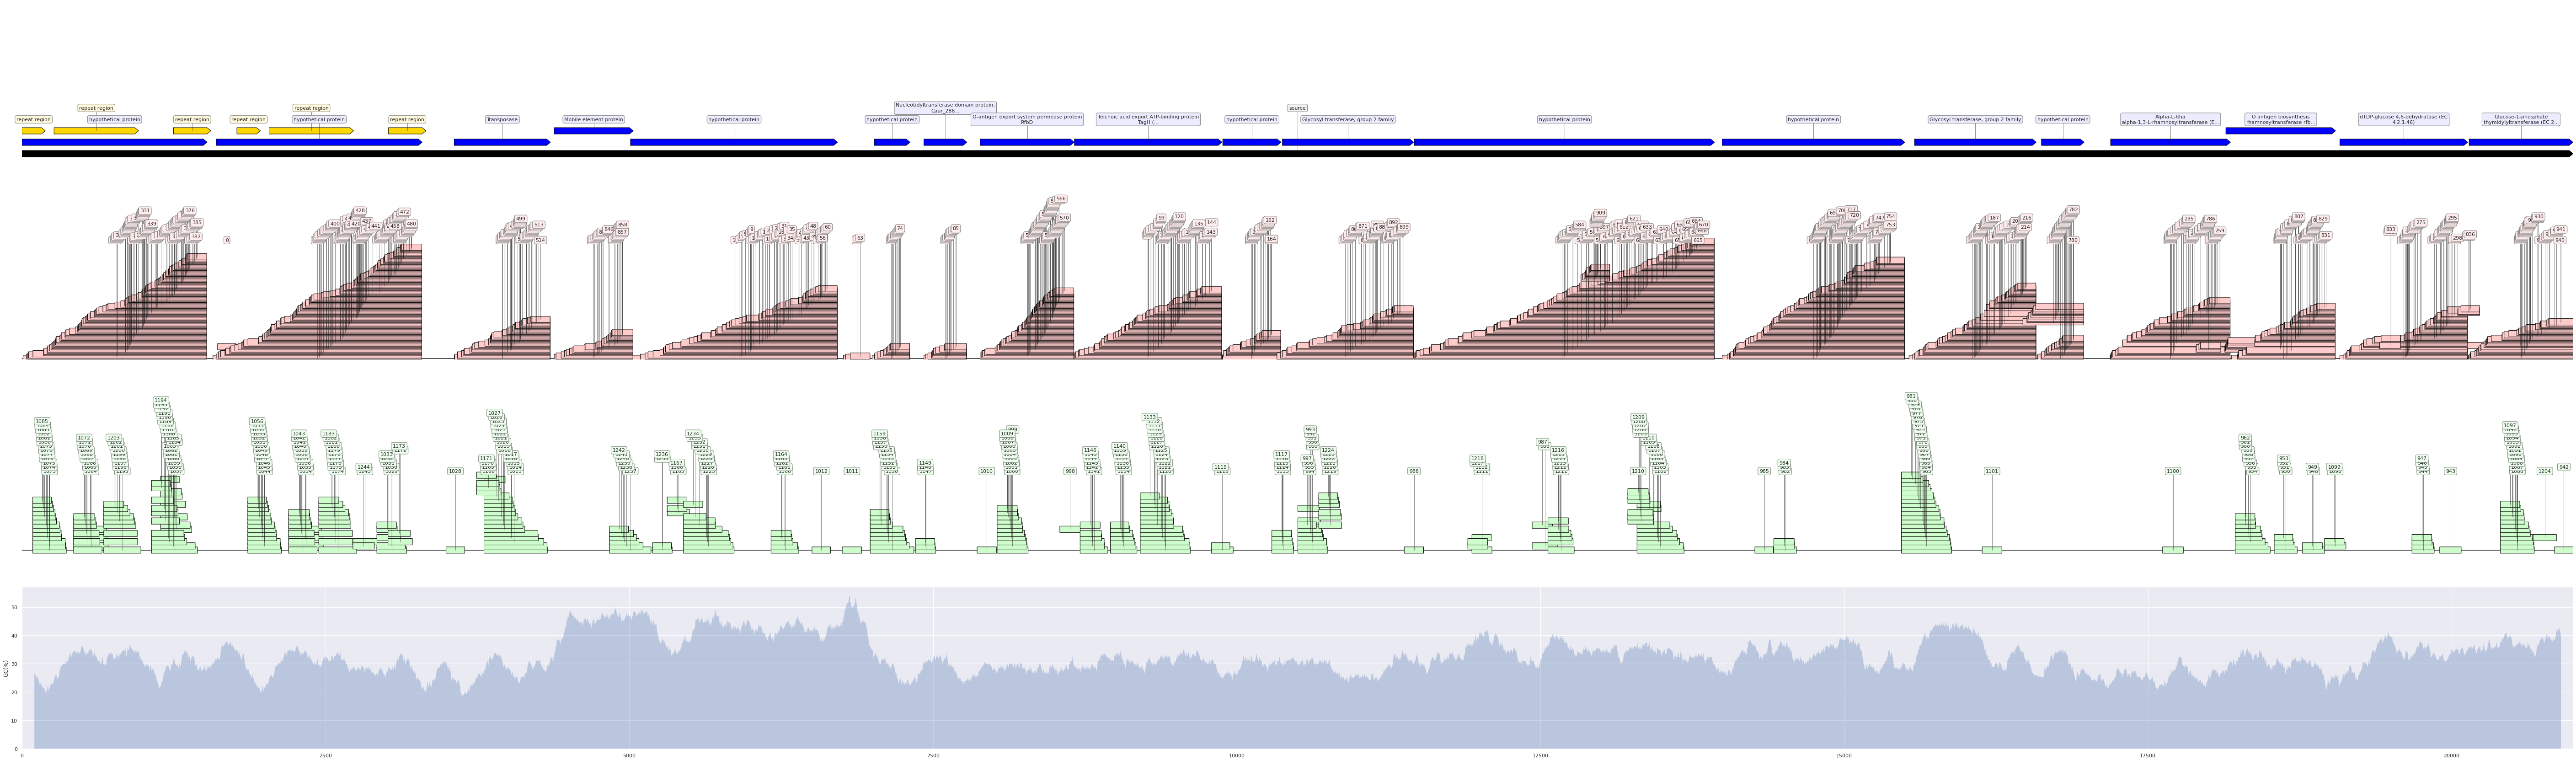

In [6]:
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np


fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    4, 1, figsize=(100,30), sharex=True)

# PLOT THE RECORD MAP
record = SeqIO.read("/home/pavel/Desktop/8_семестр/GEL/6666666.540225.gbk", "genbank")
graphic_record = MyCustomTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False)

my_record = GraphicRecord(sequence_length=len(sequence), sequence=sequence, features = features_pos)
ax, _ = my_record.plot(ax=ax2, with_ruler=False)

my_record = GraphicRecord(sequence_length=len(sequence), sequence=sequence, features = features_neg)
ax, _ = my_record.plot(ax=ax3, with_ruler=False)

# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
window = 200
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / window
xx = np.arange(len(record.seq) - window)
yy = [gc(record.seq[x : x + window]) for x in xx]
ax4.fill_between(xx + window//2, yy, alpha=0.3)
ax4.set_ylim(bottom=0)
ax4.set_ylabel("GC(%)")


In [7]:

files_mat = [f for f in os.listdir("./human_tf2dna_matrices_symbols") if os.path.splitext(f)[1] == '.mat'] 
print("Input files ... ")
#[print(x) for x in files_gb]
print(len(files_mat))
print("")



MAT_DICT = {}
for i in files_mat:
    with open("./human_tf2dna_matrices_symbols/" + i) as file:
        line = [x.split(" ") for x in file.read().strip().split("\n")]
        #print(line)
        #print(line[0], len(line[0]))
        SD = []
        for j in range(1,len(line[0])):
            ss = [x[j] for x in line]
            d = {"A":float(ss[0]), "C":float(ss[1]), "G":float(ss[2]), "T":float(ss[3])}
            SD.append(d)
        SD = tuple(SD)

        #print(i.split(".mat")[0])
        MAT_DICT[i.split(".mat")[0]] = SD
        


def checkSD(SD_seq, SD): # функция для поиска SD
    score = 0
    for n in range(len(SD_seq)-len(SD)):
        sub = SD_seq[n:n+len(SD)]
        subscore = 1
        for l in range(len(sub)):
            if sub[l] in SD[l]:
                subscore *= SD[l][sub[l]]
            else:
                subscore *= 0
        score = max(subscore, score)
    return round(score, round_param)


df = pd.DataFrame(index=[x for x in range(len(final_table["Stem loop seq"]))])
#print(df)

for j in list(MAT_DICT.keys()):
    tmp = []    
    print(j)
    for i in final_table["Stem loop seq"]: 
        #print(i, MAT_DICT[j])
        #print(math.isnan(i))
        if i is np.nan:
            tmp.append(None)
        else:
            res = checkSD(i, MAT_DICT[j])
            tmp.append(res)
            
    df[j] = tmp
print(df)





Input files ... 
1314

SALL2
HMX3
NEUROG2
ZNF140
NKX2-3
MESP1
SP140
ZNF211
FOXA2
JUNB
REPIN1
ZNF30


KeyboardInterrupt: 

In [9]:
len(sequence)

21000

In [8]:
df2 = df.copy()
df2["max_value"]=df.max(axis=1)
df2["possible_TF"]=df.idxmax(axis=1)
df2

,SALL2,HMX3,NEUROG2,ZNF140,NKX2-3,MESP1,SP140,ZNF211,FOXA2,JUNB,REPIN1,max_value,possible_TF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0016,0.0,0.0026,0.0,0.0158,0.0025,0.0002,0.0003,0.0006,0.0038,0.0044,0.0158,NKX2-3
5,0.0001,0.0,0.0026,0.0,0.0158,0.0025,0.0001,0.0003,0.0006,0.0038,0.0099,0.0158,NKX2-3
6,0.0001,0.0,0.0026,0.0,0.0158,0.0025,0.0001,0.0003,0.0006,0.0038,0.0099,0.0158,NKX2-3
7,0.0001,0.0,0.0026,0.0,0.0158,0.0025,0.0001,0.0003,0.0000,0.0004,0.0099,0.0158,NKX2-3
8,0.0038,0.0,0.0002,0.0,0.0056,0.0025,0.0014,0.0001,0.0000,0.0036,0.0099,0.0099,REPIN1
9,0.0038,0.0,0.0002,0.0,0.0056,0.0025,0.0014,0.0001,0.0000,0.0084,0.0099,0.0099,REPIN1
